## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

## Data Loading

In [3]:
data_dir = Path("../input/atma5/")

train = pd.read_csv(data_dir / "train.csv")
test = pd.read_csv(data_dir / "test.csv")
fitting = pd.read_csv(data_dir / "fitting.csv")
spec_train = pd.read_csv(data_dir / "train_spectrum.csv")
spec_test = pd.read_csv(data_dir / "test_spectrum.csv")

## Check Histogram

In [5]:
def make_train_test_hist(train: pd.DataFrame, test: pd.DataFrame, 
                         name: str, bins=None):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    train_target_0 = train[name][train["target"] == 0]
    train_target_1 = train[name][train["target"] == 1]
    
    weights_0 = np.ones(len(train_target_0)) / float(len(train_target_0))
    weights_1 = np.ones(len(train_target_1)) / float(len(train_target_1))
    
    axes[0].hist(train[name], alpha=0.5, label="train", bins=bins)
    axes[0].hist(test[name], alpha=0.5, label="test", bins = bins)
    axes[0].set_title(f"{name}_test")
    axes[0].legend()
    
    axes[1].hist(train_target_0, weights=weights_0, alpha=0.5, label="target_0", bins=bins)
    axes[1].hist(train_target_1, weights=weights_1, alpha=0.5, label="target_1", bins=bins)
    axes[1].set_title(f"{name}_train_target_0_1")
    axes[1].legend()
    
    plt.show()

In [10]:
train_agg = spec_train.groupby(
    "spectrum_filename")["intensity"].agg(["min", "max", "std", "median", "mean", "skew"])
test_agg = spec_test.groupby(
    "spectrum_filename")["intensity"].agg(["min", "max", "std", "median", "mean", "skew"])

### Plot max

In [11]:
merged_train = train.merge(train_agg, on="spectrum_filename", how="left")
merged_test = test.merge(test_agg, on="spectrum_filename", how="left")

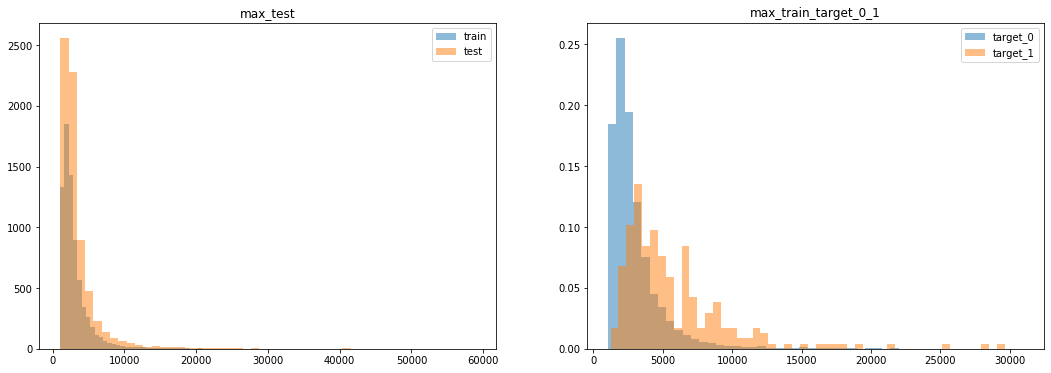

In [13]:
make_train_test_hist(merged_train, merged_test, name="max", bins=50)

In [14]:
T = 10000

max_threshed_train = merged_train.copy()
max_threshed_test = merged_test.copy()
max_threshed_train.loc[max_threshed_train["max"] > T, "max"] = 10000
max_threshed_test.loc[max_threshed_test["max"] > T, "max"] = 10000

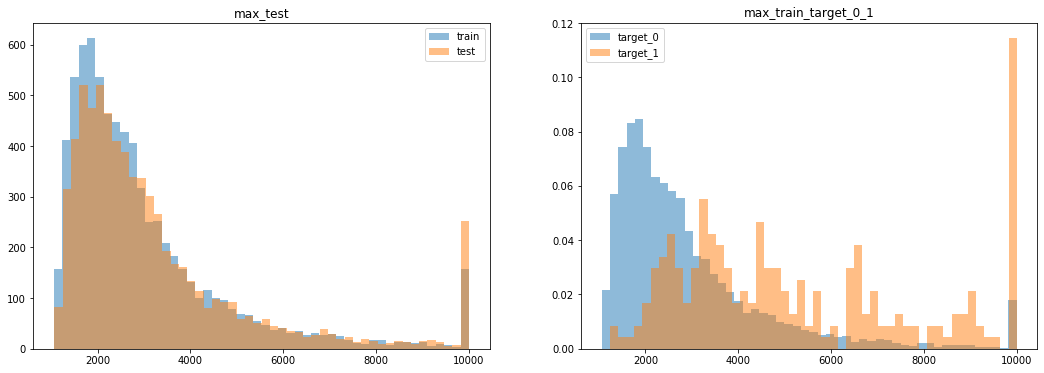

In [16]:
make_train_test_hist(max_threshed_train, max_threshed_test, name="max", bins=50)

### Plot min

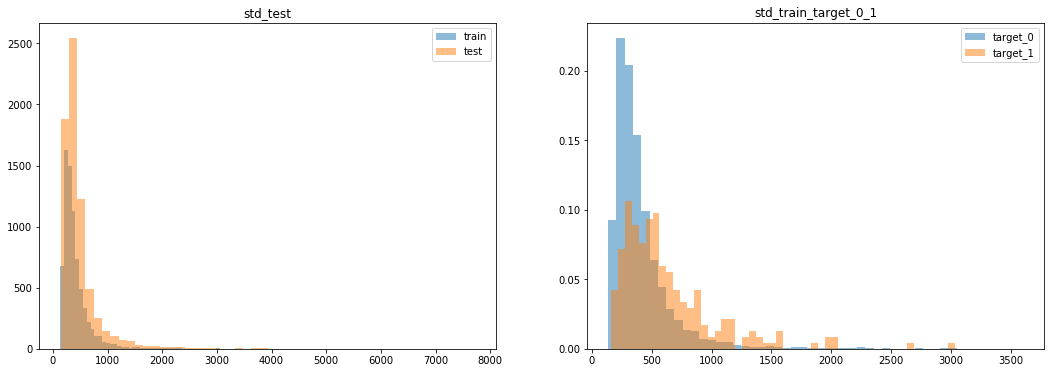

In [20]:
make_train_test_hist(merged_train, merged_test, name="std", bins=50)